<a href="https://colab.research.google.com/github/sabinaML/python_basic/blob/main/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Переведите содержимое файла purchase_log.txt в словарь purchases вида:
{‘1840e0b9d4’: ‘Продукты’, …}

In [3]:
f=open('purchase_log.txt', 'r')

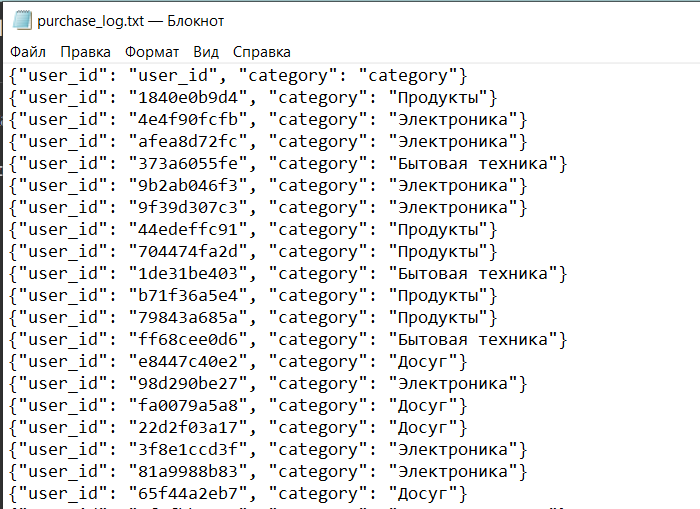

In [4]:
import json

In [ ]:
dict_={}
with open('purchase_log.txt', 'r') as f:
  for line in f:
    k=json.loads(line)
    dict_[k['user_id']] = k['category']

In [ ]:
dict_

{'user_id': 'category',
 '1840e0b9d4': 'Продукты',
 '4e4f90fcfb': 'Электроника',
 'afea8d72fc': 'Электроника',
 '373a6055fe': 'Бытовая техника',
 '9b2ab046f3': 'Электроника',
 '9f39d307c3': 'Электроника',
 '44edeffc91': 'Продукты',
 '704474fa2d': 'Продукты',
 '1de31be403': 'Бытовая техника',
 'b71f36a5e4': 'Продукты',
 '79843a685a': 'Продукты',
 'ff68cee0d6': 'Бытовая техника',
 'e8447c40e2': 'Досуг',
 '98d290be27': 'Электроника',
 'fa0079a5a8': 'Досуг',
 '22d2f03a17': 'Досуг',
 '3f8e1ccd3f': 'Электроника',
 '81a9988b83': 'Электроника',
 '65f44a2eb7': 'Досуг',
 '5f8fbb0149': 'Бытовая техника',
 '3ecff691fd': 'Электроника',
 'dd0e912251': 'Электроника',
 '9250593d55': 'Электроника',
 '37c4e090e4': 'Электроника',
 '22fa3ea76f': 'Электроника',
 '73b876b237': 'Электроника',
 'f983a69d67': 'Товары для животных',
 '4ea17212f8': 'Продукты',
 'c6de96a5e2': 'Товары для животных',
 'd8e3bcee53': 'Продукты',
 '680aa815f9': 'Продукты',
 '4a92a68cf9': 'Электроника',
 '905e60cb52': 'Бытовая техника'

2. Для каждого user_id в файле visit_log.csv определите третий столбец с категорией покупки (если покупка была, сам файл visit_log.csv изменять не надо). Запишите в файл funnel.csv визиты из файла visit_log.csv, в которых были покупки с указанием категории.
Учтите условия на данные:
содержимое purchase_log.txt помещается в оперативную память компьютера
содержимое visit_log.csv - нет; используйте только построчную обработку этого файла

In [ ]:
with open('purchase_log.txt', 'r') as f:
  content=f.readlines()

In [ ]:
i=0
with open('/content/visit_log.csv', 'r', encoding = 'utf-8') as f1:
  with open('/content/funnel.csv ', 'w', encoding = 'utf-8') as f2:
    for line in f1:
      n=line.strip().split(',')
      if n[0] in dict_.keys():
        n.append(dict_.get(n[0], 'no data'))
        s=','.join(n)
        f2.write(s+'\n')


In [ ]:
import pandas as pd


In [ ]:
pd.read_csv('/content/funnel.csv ')

,user_id,source,category
0,1840e0b9d4,other,Продукты
1,4e4f90fcfb,context,Электроника
2,afea8d72fc,other,Электроника
3,2824221f38,email,Продукты
4,373a6055fe,other,Бытовая техника
...,...,...,...
13793,cb2da172f8,other,Строительство и ремонт
13794,047fbda813,other,Бытовая техника
13795,cf797f912d,other,Бытовая техника
13796,9ff57c335f,context,Товары для животных
